# Food choices and preferences of college students

This dataset includes information on food choices, nutrition, preferences, childhood favorites, and other information from college students. There are 126 responses from students.<br>
Data comes from [kaggle](https://www.kaggle.com/borapajo/food-choices/data).<br>
<br>
**The main goals:**<br>
- data preparation/cleaning training<br>
- feature engineering<br>
- playing with visualization<br>
<br>
Dataset can be used in natural language processing.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [139]:
# Load data
df = pd.read_csv('food_coded.csv')

In [140]:
# Check data frame's shape
df.shape

(125, 61)

In [141]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [142]:
# Data features
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

space for feature's comments

In [143]:
# Explore the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GPA,123,38,3.5,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,125,NaN,NaN,NaN,1.392,0.490161,1,1,1,2,2
breakfast,125,NaN,NaN,NaN,1.112,0.316636,1,1,1,1,2
calories_chicken,125,NaN,NaN,NaN,577.32,131.214,265,430,610,720,720
calories_day,106,NaN,NaN,NaN,3.0283,0.639308,2,3,3,3,4
calories_scone,124,NaN,NaN,NaN,505.242,230.841,315,420,420,420,980
coffee,125,NaN,NaN,NaN,1.752,0.43359,1,2,2,2,2
comfort_food,124,124,"Grandma's Chinese, Peruvian food from back hom...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comfort_food_reasons,124,107,boredom,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comfort_food_reasons_coded,106,NaN,NaN,NaN,2.69811,1.97204,1,2,2,3,9


In [144]:
# Check how many features have missing data
df.isnull().any().value_counts()

True     34
False    27
dtype: int64

In [145]:
# Explore datatypes
col_dtypes = np.array([df[x].dtype for x in df.columns])
np.unique(col_dtypes)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [146]:
# Quick look at features list with object datatype
df2 = pd.DataFrame({'dtype_': col_dtypes}, index=df.columns)

In [147]:
df2 = df2[df2['dtype_'] == object]
df2

,dtype_
GPA,object
comfort_food,object
comfort_food_reasons,object
diet_current,object
eating_changes,object
father_profession,object
fav_cuisine,object
food_childhood,object
healthy_meal,object
ideal_diet,object


Create a data frame with more details about possible blended values or missing data.

In [148]:
types = {}
dtypes_dict = {"<class 'numpy.int64'>": 'int', "<class 'numpy.float64'>": 'float', "<class 'str'>": 'str', "<class 'int'>": 'int', "<class 'float'>": 'float'}

for feature in df2.index.values:
    feat_dict = {}
    for value in df[feature].values:
        dtype = str(type(value))

        if dtypes_dict[dtype] not in feat_dict.keys():
            feat_dict[dtypes_dict[dtype]] = 1
        else:
            feat_dict[dtypes_dict[dtype]] += 1
    types[feature] = feat_dict
    feat_dict = {}

In [149]:
df3 = pd.DataFrame.from_dict(types).T

In [150]:
df3.fillna(value=0)

,float,str
GPA,2,123
comfort_food,1,124
comfort_food_reasons,1,124
diet_current,1,124
eating_changes,3,122
father_profession,3,122
fav_cuisine,2,123
food_childhood,1,124
healthy_meal,1,124
ideal_diet,1,124


# Correcting erroneous values

###  'GPA' feature

Let's try to replace non-numeric values to NaN and fix blended data.

In [49]:
df['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 joker', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [135]:
# Take the most common value to fill. Assume that it will not oversimplify model (<5% of columns data to replace).
df['GPA'].value_counts().head()

3.5    17
3.0    11
3.2    10
3.7    10
3.4     9
Name: GPA, dtype: int64

In [121]:
# Use regex to clean blended data, fill missing values and set up dtype
df['GPA'] = df['GPA'].str.replace(r'[^\d\.\d+]', '').replace((np.nan, ''), '3.5').astype(float).round(2)

In [122]:
df['GPA'].unique()

array([2.4 , 3.65, 3.3 , 3.2 , 3.5 , 2.25, 3.8 , 3.9 , 3.4 , 3.6 , 3.1 ,
       4.  , 2.2 , 3.87, 3.7 , 2.8 , 3.  , 3.89, 2.9 , 3.83, 3.29, 3.35,
       2.6 , 3.67, 3.73, 3.79, 2.71, 3.68, 3.75, 3.92, 3.77, 3.63, 3.88])

Text(0.5,1,"'GPA' distribution")

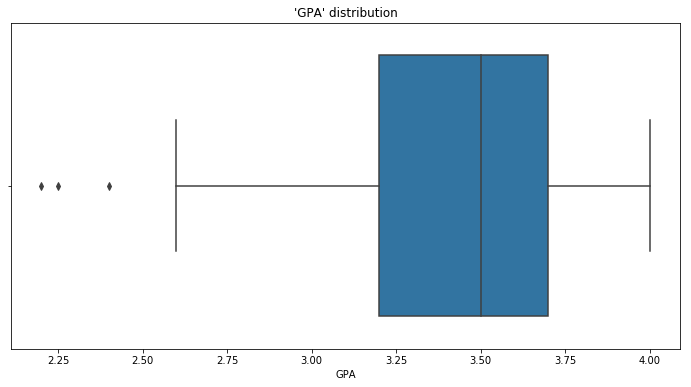

In [136]:
# Boxplot to visualize and check results
fig, ax = plt.subplots(figsize=[12,6])
sb.boxplot(df['GPA'])
ax.set_title("'GPA' distribution")

### 'weight' feature

In [130]:
df['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

to be continued